<a href="https://colab.research.google.com/github/Code-rolling/deforestation/blob/main/Veri_Gorsellestirme_Efe_Bektas_Deforestation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

forest = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest.csv', parse_dates=["year"])
forest_area = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest_area.csv', parse_dates=["year"])
brazil_losses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/brazil_loss.csv', parse_dates=["year"])
soybean_use = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/soybean_use.csv', parse_dates=["year"])
vegetable_oil = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/vegetable_oil.csv', parse_dates=["year"])



#ülke kodlarına ihtiyacımız yok
forest.drop("code", axis=1, inplace=True)
forest_area.drop("code", axis=1, inplace=True)
brazil_losses.drop("code", axis=1, inplace=True)
soybean_use.drop("code", axis=1, inplace=True)
vegetable_oil.drop("code", axis=1, inplace=True)

#Soru 1: Ormansızlaşma ile ormana sahip olma arasında bir ilişki var mı?



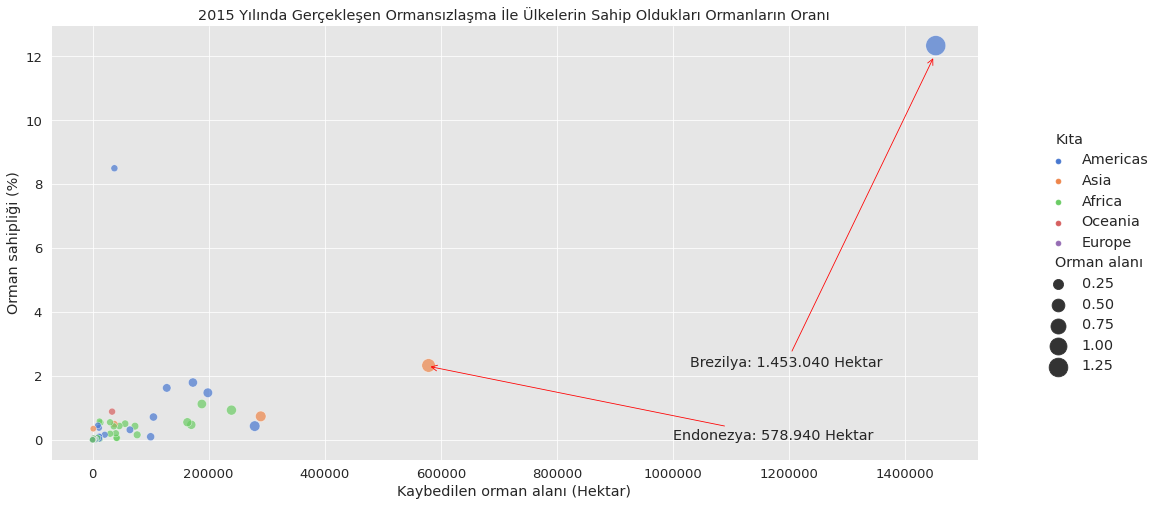

In [ ]:


#Manipule edeceğimiz seti belirleriz. yılı 2015 olanları alırız.
forest_copy=forest.loc[forest.year=="2015"]

#forest verisinden sadece net orman kaybeden(negatif) ülkeleri alırız.
forest_copy=forest_copy.loc[forest.net_forest_conversion<0]

#orman kaybedenler negatifle gösterildiği için değerleri-1 ile çarparız
forest_copy["negative_conversion"]=forest_copy['net_forest_conversion']*(-1) 
forest_copy.sort_values("negative_conversion",ascending=False, inplace=True, ignore_index=True)

# dünya kümülatif verisini çıkarırız
forest_copy.drop(0,inplace=True)

#seçtiğimiz ülkelerle o ülkelerin orman alanlarını eşleştirmeliyiz
#ülkeleri index olarak kullanırız;
forest_copy.set_index("entity")
forest_area.set_index("entity")

#kullacağımız diğer setin zaman aralığını alırız
forest_area_copy=forest_area.loc[forest_area.year=="2015",:]

#yeni bir df yaratıp iki veri setini birleştiririz, Inner join yaparız;
forest_combine = pd.merge(forest_copy,forest_area_copy,how="inner")

#son olarak da ülkeleri bulundukları kıtaya eşleriz. Bunun için ülke_kıta çiftlerini çekeriz.
region= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/region.csv")
region.drop(8)#Antartika'yı çıkarmamız gerekiyor
forest_combine= pd.merge(forest_combine,region,how="inner",copy=True)

#grafik aşamasına geçeriz
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper",font_scale=1.5)

ax= sns.relplot(x="negative_conversion",
                y="forest_area", 
                hue="region", size="negative_conversion",
                sizes=(40, 400), alpha=.7,
                palette="muted",
                height=7,aspect=2,x_jitter=True, 
                data=forest_combine)

#isimlendirme
ax.set(xlabel='Kaybedilen orman alanı (Hektar)', ylabel='Orman sahipliği (%)')
plt.title("2015 Yılında Gerçekleşen Ormansızlaşma İle Ülkelerin Sahip Oldukları Ormanların Oranı")
L=ax._legend
L.get_texts()[0].set_text("Kıta")
L.get_texts()[6].set_text("Orman alanı")

#ok ile gösterim
plt.annotate("Brezilya: 1.453.040 Hektar", xy=(1450000,12),xytext=(1030000,2.3), 
             arrowprops={"arrowstyle":"->","color":"red"})
plt.annotate("Endonezya: 578.940 Hektar", xy=(578940,2.3),xytext=(1000000,0), 
             arrowprops={"arrowstyle":"->","color":"red"})

plt.ticklabel_format(style='plain')
plt.savefig("soru1.png",quality=50,dpi=300)
plt.show()


#Brezilyadaki ormansızlaşma sadece 2015 yılına mı özel yoksa sabit bir artış var mı?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

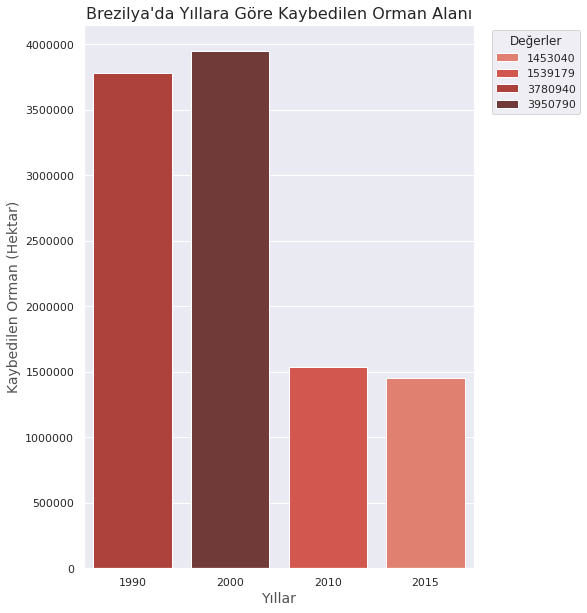

In [ ]:
# yıla göre değişim gösteren bir barlot çizeriz.

#veriden Brezilya'yı çekeriz
brazil_loss= forest.loc[forest.entity=="Brazil",:]
brazil_loss["negative_conversion"]=brazil_loss["net_forest_conversion"]*(-1)

#datetime'daki ay-gün bilgilerinden kurtulmalıyız
brazil_loss['only_year'] = pd.DatetimeIndex(brazil_loss['year'],copy=True).year

#kayıtlardaki virgüllerden kurtuluruz
#brazil_loss.negative_conversion.round(decimals=1, inplace=True)
brazil_loss["negative_conversion"] = brazil_loss["negative_conversion"].astype(int)

plt.ticklabel_format(style='plain')

sns.set(rc={'figure.figsize':(7,10)})

ax= sns.barplot(x="only_year",y="negative_conversion",
                data=brazil_loss,dodge=False,hue="negative_conversion",
                palette=sns.color_palette("Reds_d", n_colors=4, desat=1))
ax.legend(bbox_to_anchor= (1.03, 1) )

ax.set_xlabel("Yıllar", fontsize=14, alpha=0.8)
ax.set_ylabel("Kaybedilen Orman (Hektar)", fontsize=14, alpha=0.8)
ax.set_title("Brezilya'da Yıllara Göre Kaybedilen Orman Alanı",fontsize=16)
ax.legend_.set_title("Değerler")

sns.set(rc={'figure.figsize':(7,10)})

plt.savefig("soru2.png",bbox_inches = 'tight',quality=50,dpi=300)

plt.show()


#Brezilya'da orman tahribatını etkileyen faktörler neler?




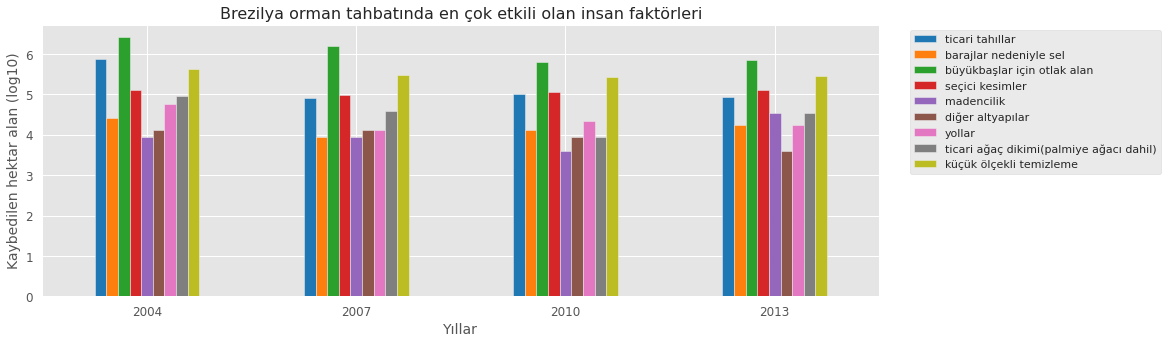

In [ ]:
#ihtiyacımız olmayan sütunları çıkarırız
brazil_losses['only_year'] = pd.DatetimeIndex(brazil_losses['year']).year
#brazil_losses.set_index("only_year", inplace=True)
brazil_losses.drop(["entity","year","natural_disturbances","fire"],axis=1, inplace=True)
brazil_losses.replace(0,np.nan,inplace=True)
brazil_losses.interpolate(method ='linear', limit_direction ='forward',inplace=True)

brazil_inner=brazil_losses[brazil_losses["only_year"].isin([2013,2010,2007,2004])]
brazil_inner.set_index("only_year",inplace=True)
brazil_inner_log = np.log10(brazil_inner)

#grafiği çizeriz
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

color=('tab:blue','tab:orange','tab:green','tab:red','tab:purple'
        ,'tab:brown','tab:pink','tab:gray','tab:olive')

ax=brazil_inner_log.plot(
        kind='bar',
        stacked=False,
        title='',fontsize=12,
        color=color
        )

ax.set_xlabel("Yıllar",fontsize=14)
plt.xticks(rotation=0)
ax.set_ylabel("Kaybedilen hektar alan (log10)",fontsize=14)
plt.legend(['ticari tahıllar', 'barajlar nedeniyle sel ', 'büyükbaşlar için otlak alan',
       'seçici kesimler', 'madencilik', 'diğer altyapılar', 'yollar',
       'ticari ağaç dikimi(palmiye ağacı dahil)', 'küçük ölçekli temizleme'],bbox_to_anchor= (1.03, 1))

plt.title('Brezilya orman tahbatında en çok etkili olan insan faktörleri', fontdict = {'fontsize' : 16})
plt.savefig("soru3.png",bbox_inches = 'tight',quality=50,dpi=300)
plt.show()

# Brezilya'da en çok hangi tarım ürünü üretiliyor?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

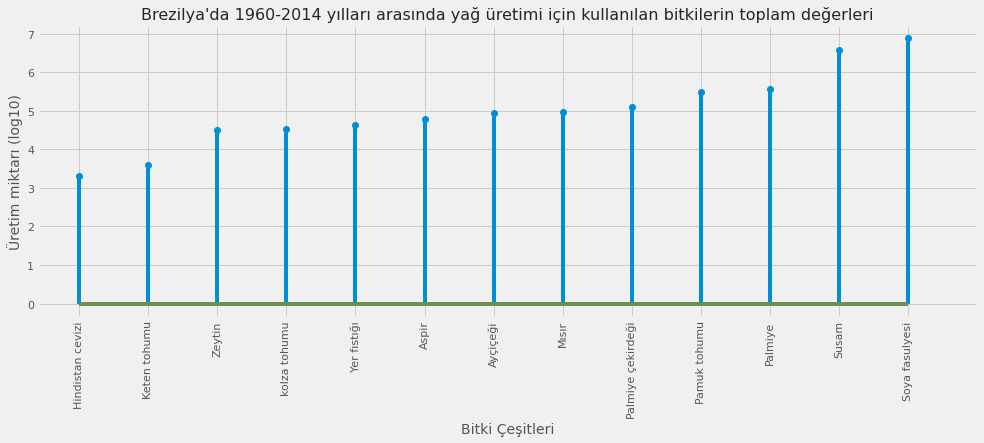

In [ ]:


#vegetable_oil veri setinden brezilyayı alırız.
#zamana bağlı bitkileri kümülatif olarak toplarız
#değerleri en büyük 5 bitkiyi spiderplot olarak veririz

#brezilya verilerini alırız
plant=vegetable_oil.loc[vegetable_oil.entity=="Brazil"]
#ana verilerini tahmin yaparız
plant.interpolate(method ='linear', limit_direction ='forward',inplace=True)
#mahsüllerin kümülatif verisini çıkarırız
plant.drop(["entity","year"],axis=1,inplace=True)
plant["cumsum"]=plant.groupby("crop_oil")["production"].cumsum()
planty=plant.iloc[-14:-1]
planty["log"] = np.log10(planty["production"])

#derlememizi yaparız
planty.sort_values(by="log",inplace=True)
planty.index = np.arange(1, len(planty) + 1)
my_range=range(0,len(planty.index)+1)

#grafiği oluştururuz
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots()
plt.xticks(rotation=90)
ax.stem(planty['log'])
plt.xticks( my_range, planty['crop_oil'])

ax.set_ylabel("Üretim miktarı (log10)", fontsize=14)
ax.set_xlabel("Bitki Çeşitleri", fontsize=14)
bars=("Hindistan cevizi","Keten tohumu","Zeytin","kolza tohumu","Yer fıstığı",
      "Aspir","Ayçiçeği","Mısır","Palmiye çekirdeği","Pamuk tohumu","Palmiye",
      "Susam","Soya fasulyesi" )
range=np.arange(len(bars))
plt.xticks(range,bars,rotation=90)
plt.title("Brezilya'da 1960-2014 yılları arasında yağ üretimi için kullanılan bitkilerin toplam değerleri",fontsize=16)
fig.savefig("soru4.png",bbox_inches = 'tight',quality=50,dpi=300)
plt.show()